# Advanced Course in ML: Exercise Set 4

## GMM implementation

In [1]:
import numpy as np


def logsumrows(X):
	"""
	Computes the sums of rows of log-numbers

	Parameters
	----------
    X : an array of size (n, m)
        matrix of log-numbers

	Returns
	-------
	s : an array of size n
		ith element is the sum of the ith row
	"""

	# place your code here
	n = X.shape[0]
	M = np.max(X, axis=1)
	return M + np.log(np.sum(np.exp(X - M.reshape((n, 1))), axis=1))


def computeparameters(R, X):
	"""
	Computes the optimal parameters for the Gaussian mixture model
	
	Parameters
	----------
    X : an array of size (n, m)
		input data matrix
    R : an array of size (n, k)
		responsibilities: R[i, j] = probability of data point i belonging to
		jth component.

	Returns
	-------
	prior : an array of size k
		prior probabilities of the components
	mu : an array of size (k, m)
		optimal means: mu[i, :] is the optimal mean of the ith component
	C : an array of size (k, m, m)
		optimal covariances: C[i, :, :] is the optimal covariance matrix of the
		ith component
	"""

	k = R.shape[1]
	n, dim = X.shape

	prior = np.zeros(k)
	mu = np.zeros((k, dim))
	C = np.zeros((k, dim, dim))

	# place your code here
	for i in range(k):
		sum_Ri = np.sum(R[:,i])
		prior[i] = sum_Ri/n
		mu[i,:] = np.sum(R[:, i].reshape((n,1))*X, axis=0) / sum_Ri
		C[i,:,:] = np.cov(X - mu[i,:], aweights=R[:,i], ddof=0, rowvar=False)

	return prior, mu, C


def computeparametersdiagonal(R, X):
	"""
	Computes the optimal parameters for the Gaussian mixture model with
	diagonal covariance matrices.
	
	Parameters
	----------
    X : an array of size (n, m)
		input data matrix
    R : an array of size (n, k)
		responsibilities: R[i, j] = probability of data point i belonging to
		jth component.

	Returns
	-------
	prior : an array of size k
		prior probabilities of the components
	mu : an array of size (k, m)
		optimal means: mu[i, :] is the optimal mean of the ith component
	C : an array of size (k, m, m)
		optimal covariances: C[i, :, :] is the optimal covariance diagonal
		matrix of the ith component 
	"""

	k = R.shape[1]
	n, dim = X.shape

	prior = np.zeros(k)
	mu = np.zeros((k, dim))
	C = np.zeros((k, dim, dim))

	# place your code here
	for i in range(k):
		s = np.zeros(dim)
		sum_Ri = np.sum(R[:, i])
		prior[i] = sum_Ri/n
		mu[i,:] = np.sum(R[:, i].reshape((n,1))*X, axis=0) / sum_Ri
		for j in range(dim):
			for l in range(n):
				s[j] += R[l, i] * (X[l, j] - mu[i, j])**2
			s[j] /= sum_Ri
		C[i, :, :] = np.diag(s)
	
	return prior, mu, C


def computeparameterssame(R, X):
	"""
	Computes the optimal parameters for the Gaussian mixture model with
	equal covariance matrices.
	
	Parameters
	----------
    X : an array of size (n, m)
		input data matrix
    R : an array of size (n, k)
		responsibilities: R[i, j] = probability of data point i belonging to
		jth component.

	Returns
	-------
	prior : an array of size k
		prior probabilities of the components
	mu : an array of size (k, m)
		optimal means: mu[i, :] is the optimal mean of the ith component
	C : an array of size (k, m, m)
		optimal covariances: C[i, :, :] is the optimal covariance matrix of the
		ith components, the covariance matrices must be the same
	"""

	k = R.shape[1]
	n, dim = X.shape

	prior = np.zeros(k)
	mu = np.zeros((k, dim))
	C = np.zeros((k, dim, dim))
	sum_R = np.sum(R)

	# place your code here
	for i in range(k):
		sum_Ri = np.sum(R[:,i])
		prior[i] = sum_Ri/n
		mu[i,:] = np.sum(R[:,i].reshape((n,1))*X, axis=0) / sum_Ri
	
	for i in range(n):
		for j in range(k):
			C += R[i][j] * (X[i]-mu[j]).reshape(-1,1)@(X[i]-mu[j]).reshape(1,-1) / sum_R

	return prior, mu, C


def computeparametersspherical(R, X):
	"""
	Computes the optimal parameters for the Gaussian mixture model with
	equal diagonal spherical covariance matrices.
	
	Parameters
	----------
    X : an array of size (n, m)
		input data matrix
    R : an array of size (n, k)
		responsibilities: R[i, j] = probability of data point i belonging to
		jth component.

	Returns
	-------
	prior : an array of size k
		prior probabilities of the components
	mu : an array of size (k, m)
		optimal means: mu[i, :] is the optimal mean of the ith component
	C : an array of size (k, m, m)
		Optimal covariances: C[i, :, :] is the optimal covariance diagonal
		matrix of the ith component. The numbers on the diagonals must be equal.
	"""
	k = R.shape[1]
	n, dim = X.shape

	prior = np.zeros(k)
	mu = np.zeros((k, dim))
	C = np.zeros((k, dim, dim))

	sum_R = np.sum(R)

	# place your code here
	for i in range(k):
		s = 0.
		sum_Ri = np.sum(R[:, i])
		prior[i] = sum_Ri/n
		mu[i, :] = np.sum(R[:, i].reshape((n,1))*X, axis=0) / sum_Ri
		for j in range(dim):
			for l in range(n):
				s += R[l, i] * (X[l, j] - mu[i, j])**2
		s /= dim
		C += s*np.eye(dim)/n
	
	return prior, mu, C


def computeresponsibilities(X, prior, mu, C):
	"""
	Computes responsibilities: R[i, j] = probability of data point i belonging
	to jth component.

	Parameters
	----------
    X : an array of size (n, m)
		input data matrix
	prior : an array of size k
		prior probabilities of the components
	mu : an array of size (k, m)
		mu[i, :] is the mean of the ith component
	C : an array of size (k, m, m)
		C[i, :, :] is the covariance matrix of the ith component
	
	Returns
	-------
    R : an array of size (n, k)
		responsibilities: R[i, j] = probability of data point i belonging to
		jth component.
	"""

	def logGaussPDF(C, mu, x):
		m = C.shape[0]
		return -0.5*(np.log((2*np.pi)**m*np.linalg.det(C)) + (x-mu).reshape(-1,1).T @ np.linalg.inv(C) @ (x-mu))

	k = prior.shape[0]
	cnt = X.shape[0]

	# place your code here
	L = np.zeros((cnt, k))
	for i in range(cnt):
		for j in range(k):
			L[i, j] = np.log(prior[j]) + logGaussPDF(C[j, :, :], X[i, :], mu[j, :])
	norm = logsumrows(L).reshape((L.shape[0], 1))

	return np.exp(L - norm)


def em(X, R, itercnt, stats):
	"""
	EM algorithm: computes model parameters given the responsibilities and
	computes the responsibilities given the parameters.  Repeats itercnt times.

	Parameters
	----------
    X : an array of size (n, m)
		input data matrix
    R : an array of size (n, k)
		initial responsibilities: R[i, j] = probability of data point i
		belonging to jth component.
	itercnt : int
		number of iterations
	stats : function
		Function for computing the model parameters given the responsibilities,
		for example, computeparameters

	Returns
	-------
    R : an array of size (n, k)
		final responsibilities: R[i, j] = probability of data point i
		belonging to jth component.
	prior : an array of size k
		prior probabilities of the components
	mu : an array of size (k, m)
		mu[i, :] is the mean of the ith component
	C : an array of size (k, m, m)
		C[i, :, :] is the covariance matrix of the ith component

	"""

	# place your code here	
	for _ in range(itercnt):
		prior, mu, C = stats(R, X)
		R = computeresponsibilities(X, prior, mu, C)
	return R, prior, mu, C


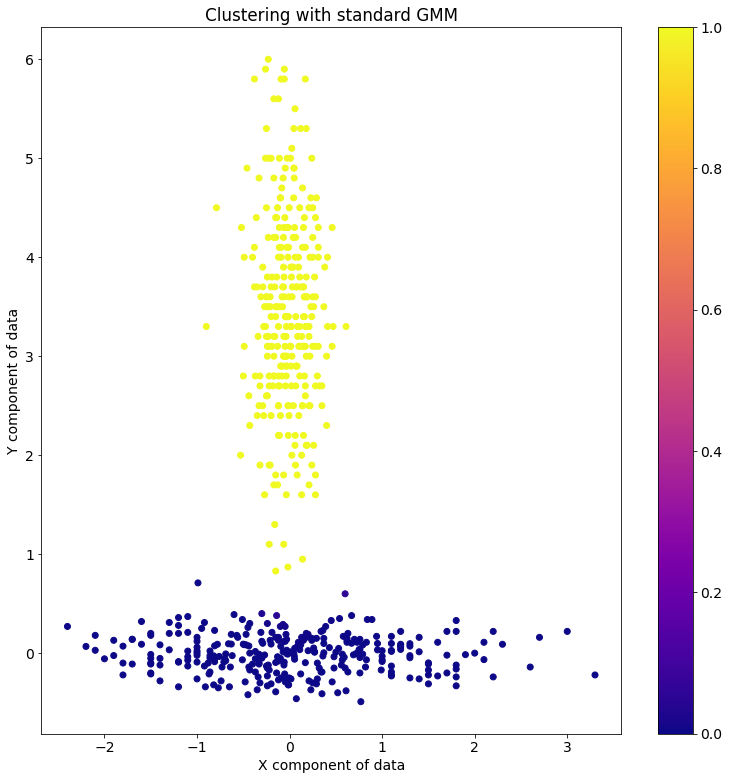

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

plt.rcParams["figure.figsize"] = (13, 13)
font = {'size'   : 14}
plt.rc('font', **font)

np.random.seed(0)

X = np.loadtxt("2gaussians.txt")
k = 2
itercnt = 100
R = np.random.rand(X.shape[0], k)
R = R / R.sum(axis=1)[:,np.newaxis]

R_stand, prior_stand, mu_stand, C_stand = em(X, R, itercnt, computeparameters)
R_same, prior_same, mu_same, C_same = em(X, R, itercnt, computeparameterssame)

plt.scatter(x=X[:,0], y=X[:,1], c=R_stand[:,0], cmap="plasma")
plt.colorbar()
plt.xlabel("X component of data")
plt.ylabel("Y component of data")
plt.title("Clustering with standard GMM")
plt.show()

Here, we can see two clearly distinguishable groups or clusters of datapoints. When we are able to assign a different covariance matrix to each component, we are able to capture the geometry for each cluster very well. This allows us to distinguish the clusters from which the datapoints come from quite well, which is the reason why we don't really have a color gradient and just two solidly colored blocks.

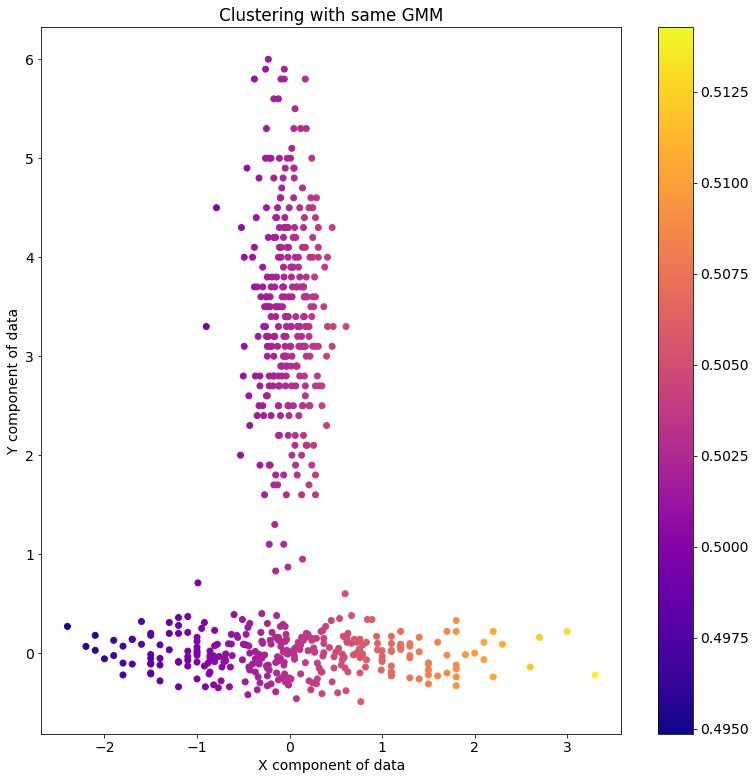

In [3]:
plt.scatter(x=X[:,0], y=X[:,1], c=R_same[:,0], cmap="plasma")
plt.colorbar()
plt.xlabel("X component of data")
plt.ylabel("Y component of data")
plt.title("Clustering with same GMM")
plt.show()

When we restrict ourselves to use the same covariance matrix for all components, we start to see more ambiguity on the clustering "decision boundary". We use only 1 component of R, but since $R_{nk} + R_{n\backslash k} = 1$ (where the backslash denotes the components not equal to $k$), and k=2, using a single component is enough as a soft cluster label. This ambiguity stems that now the single covariance matrix must account for all the shape information of all groups, so it is harder to capture geometric properties that would be "obvious" if we used a separate matrix for each component.